# MILESTONES 1

`Rizqi Rizmayani Putri Batch 002`

Link Hugging Face :

https://huggingface.co/spaces/rizqirizmayani/Churn_Predict


Link Koyeb :

https://churn-model-rizqirizmayani.koyeb.app/



## Assignment Objectives

Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat.

### IMPORT LIBRARY

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

!pip install tensorflow
!pip install feature_engine
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout

from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder, OrdinalEncoder 
from feature_engine.outliers import Winsorizer
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay,roc_auc_score,roc_curve
from sklearn import set_config
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as imbpipe

import pickle
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)
tf.random.set_seed(42)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### DATA LOADING AND OVERVIEW


In [105]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [106]:
!cp /content/kaggle.json ~/.kaggle

In [107]:
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [108]:
!kaggle datasets download -d blastchar/telco-customer-churn

telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [109]:
!unzip -q /content/telco-customer-churn.zip -d dataset

replace dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [110]:
df = pd.read_csv('/content/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv',na_values=['?',' ','99999','N/A'],skipinitialspace=True)

In [111]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [112]:
df.tail(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [114]:
df.shape

(7043, 21)

In [115]:
df[df.duplicated()].shape

(0, 21)

In [116]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


Data Loading and Overview:
- melakukan API kepada kaggle untuk mendapatkan dataframe
- tidak terdapatnnya duplicated data
- terdapat missing value pada kolom TotalCharge
- berikut adalah keterangan dari tiap-tiap kolom:
1. customerID : Customer ID
2. gender : Whether the customer is a male or a female
3. SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
4. Partner : Whether the customer has a partner or not (Yes, No)
5. Dependents : Whether the customer has a partner or not (Yes, No)
6. tenure : Number of months the customer has stayed with the company
7. PhoneService : Whether the customer has a phone service or not (Yes, No)
8. MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity :Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup :Whether the customer has online backup or not (Yes, No, No internet service)
12. DeviceProtection :Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport :Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV :Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies :Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract :The contract term of the customer (Month-to-month, One year, Two year)
17. PaperlessBilling :Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod :The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges :The amount charged to the customer monthly
20. TotalCharges :The total amount charged to the customer
21. Churn : Whether the customer churned or not (Yes or No)

### DATA CLEANING

In [118]:
df_clean = df.copy()
df_clean.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [119]:
df_clean.dropna(axis=0, inplace=True)

In [120]:
df_clean.drop(['customerID'],axis=1, inplace=True)

In [121]:
df_clean.Churn.replace({'No': 0, 'Yes': 1}, inplace=True)
df_clean.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [122]:
df_clean.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [123]:
numerical = df_clean[['tenure','MonthlyCharges','TotalCharges']].columns.tolist()
category = df_clean[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']].columns.tolist()

In [124]:
for i in category:
    print(i)
    print(df_clean[i].value_counts())
    print('-'*30)

gender
Male      3549
Female    3483
Name: gender, dtype: int64
------------------------------
SeniorCitizen
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
------------------------------
Partner
No     3639
Yes    3393
Name: Partner, dtype: int64
------------------------------
Dependents
No     4933
Yes    2099
Name: Dependents, dtype: int64
------------------------------
PhoneService
Yes    6352
No      680
Name: PhoneService, dtype: int64
------------------------------
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
------------------------------
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
------------------------------
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
------------------------------
OnlineBackup
No                     3087
Yes           

Data Cleaning:
- menghapus baris yang terdapat missing value
- drop kolom customerid dikarenakan kolom tersebut berisi informasi uniq data
- feature engenering terhadap target, no=0 dan yes=1
- melakukan pengecekan pada kolom dengan data kategorikal

### EDA for Analysis Purpose

In [125]:
df_clean.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


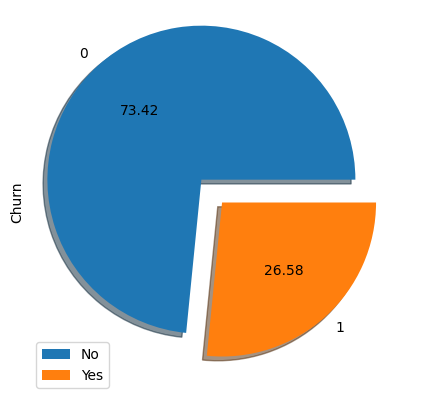

In [126]:
plt.figure(figsize = (8,5),facecolor='white')
df_clean['Churn'].value_counts().plot(kind = 'pie',explode = [0.2,0.0], shadow = True,autopct = "%.2f")
plt.legend(['No','Yes'])
plt.show()

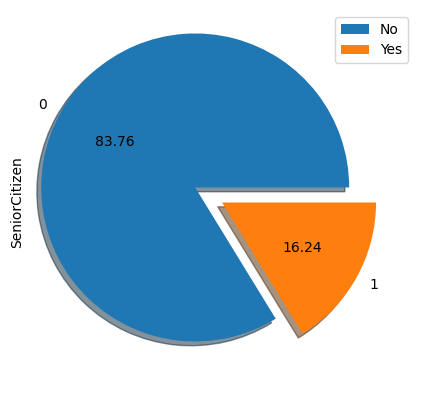

In [127]:
plt.figure(figsize = (8,5),facecolor='white')
df_clean['SeniorCitizen'].value_counts().plot(kind = 'pie',explode = [0.2,0.0], shadow = True,autopct = "%.2f")
plt.legend(['No','Yes'])
plt.show()

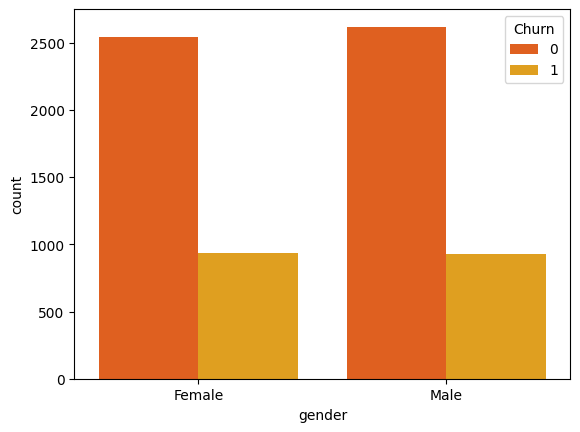

In [218]:
sns.countplot(data=df_clean,x='gender',hue='Churn',palette="autumn")

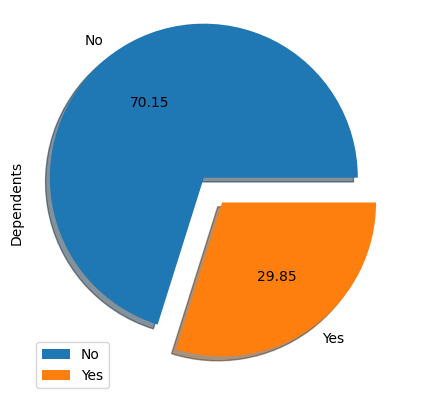

In [128]:
plt.figure(figsize = (8,5),facecolor='white')
df_clean['Dependents'].value_counts().plot(kind = 'pie',explode = [0.2,0.0], shadow = True,autopct = "%.2f")
plt.legend(['No','Yes'])
plt.show()

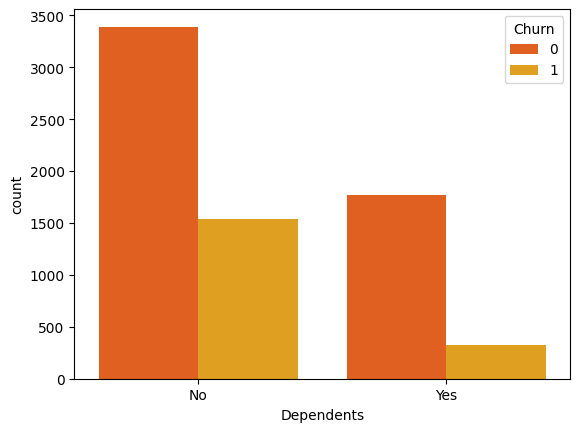

In [219]:
sns.countplot(data=df_clean,x='Dependents',hue='Churn',palette="autumn")

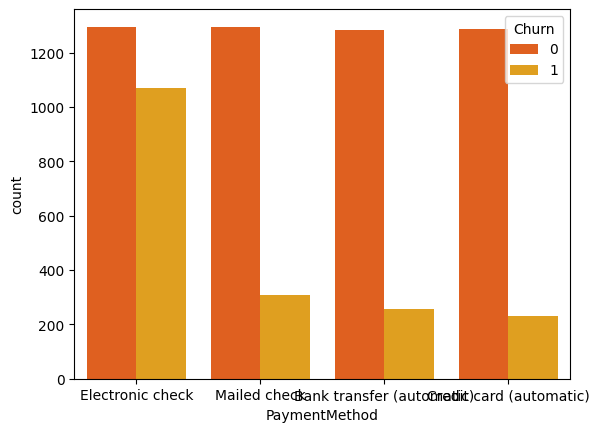

In [220]:
sns.countplot(data=df_clean,x='PaymentMethod',hue='Churn',palette="autumn")

Eksplorasi Data:
- data menunjukan imbalace data pada data target, dengan 73% untuk no dan 26% untuk yes
- senior citizen yang mana merupakan konsumen lansia, data menunjukanlebih banyak kategori 0 (tidak melakukan churn) dibandingkan kategori 1
- data gender menunjukan data yang seimbang antar kedua kategori
- data dependent menunjukan kategori 0 (tidak melakukan churn) lebih banyak dibandingkan kategori 1
- data payment method menunjukan electronick check merupakan kategori tertinggi yang melakukan churn

#### SPLIT DATA

In [131]:
feature = df_clean.drop('Churn', axis=1)
target = df_clean['Churn']

In [132]:
x_train_full, x_test,  y_train_full, y_test = train_test_split(feature,
                                                               target,
                                                               shuffle=True, test_size=0.2,
                                                               stratify= target
                                                               )

x_train, x_val, y_train, y_val = train_test_split(x_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2)

In [133]:
y_train.value_counts()

0    3300
1    1200
Name: Churn, dtype: int64

In [134]:
df_eda = pd.concat([x_train, y_train], axis=1)
df_val = pd.concat([x_val, y_val], axis=1)
testing = pd.concat([x_test, y_test], axis=1)

Proses pembagian data kedalam 3 dataframe, yaitu:
- data train dengan besaran 80% dari data
- data valuation dengan besaran 20%, data diambil dari data train
- data test dengan besaran 20% dari data

Penentuan kolom target dan kolom feature yang dituliskan dengan y untuk target dan x untuk feature

### EDA FOR MODELING

In [135]:
df_eda.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3012,Male,0,Yes,Yes,54,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic),65.65,3566.7,0
1965,Male,0,No,No,24,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),49.55,1210.4,1


#### Numerical feature

In [136]:
df_num = df_eda[['tenure','MonthlyCharges','TotalCharges']]
df_num.head(3)

,tenure,MonthlyCharges,TotalCharges
3012,54,65.65,3566.7
1965,24,49.55,1210.4
1679,7,45.75,344.2


In [137]:
skew = df_num.skew()
skewness = pd.DataFrame(skew)
skewness.columns =['value']
skewness

,value
tenure,0.230928
MonthlyCharges,-0.226500
TotalCharges,0.950924


In [138]:
skewness['distribusi']=0
for i in skewness.index:
  if (skewness["value"][i]>= -0.5) & (skewness["value"][i] <= 0.5):
    skewness["distribusi"][i]='distribusi normal'
  else:
    skewness["distribusi"][i]='distribusi tidak normal'
skewness

,value,distribusi
tenure,0.230928,distribusi normal
MonthlyCharges,-0.226500,distribusi normal
TotalCharges,0.950924,distribusi tidak normal


In [139]:
def diagnostic_plots(df_num, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_num[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_num[variable])
    plt.title('Boxplot')

    plt.show()

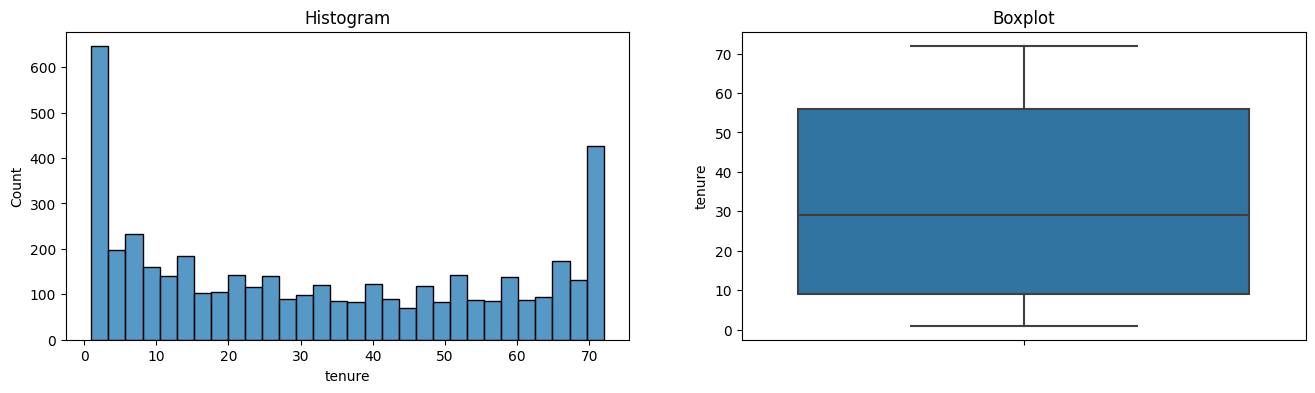

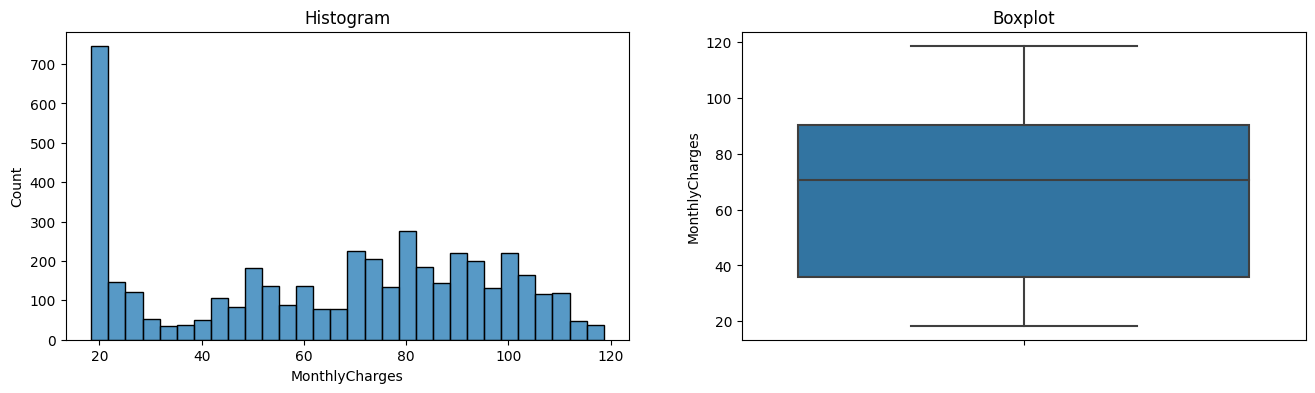

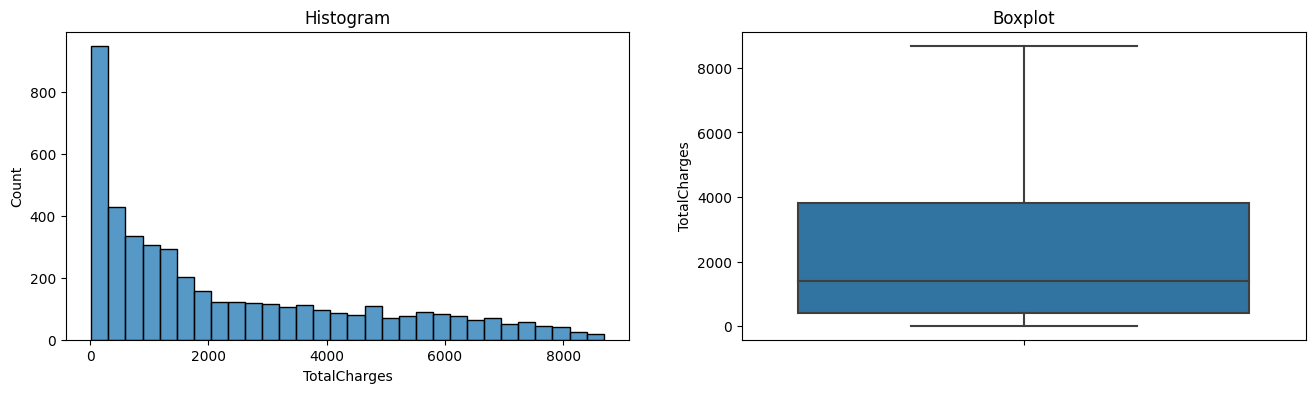

In [140]:
diagnostic_plots(df_num, 'tenure')
diagnostic_plots(df_num, 'MonthlyCharges')
diagnostic_plots(df_num, 'TotalCharges')

In [141]:
for k in df_num:
  mean = df_num[k].mean()
  std = df_num[k].std()

  upper = mean + (3 * std)
  lower = mean - (3 * std)

  outlier = df_num[(df_num[k] > upper) | (df_num[k] < lower)]
  print(k)
  print('count of outlier: ', outlier.shape[0])
  print('percent k of outlier: ', outlier.shape[0]/df_num.shape[0] * 100, '%')
  print('='*70)

tenure
count of outlier:  0
percent k of outlier:  0.0 %
MonthlyCharges
count of outlier:  0
percent k of outlier:  0.0 %
TotalCharges
count of outlier:  0
percent k of outlier:  0.0 %


In [142]:
df_num

,tenure,MonthlyCharges,TotalCharges
3012,54,65.65,3566.70
1965,24,49.55,1210.40
1679,7,45.75,344.20
12,58,100.35,5681.10
739,72,89.85,6697.35
...,...,...,...
5511,70,76.95,5289.80
1469,37,98.80,3475.55
3512,51,25.00,1260.70
6202,21,77.50,1625.00


In [143]:
scaler = StandardScaler()

df_num = scaler.fit_transform(df_num)
df_num = pd.DataFrame(df_num)

In [144]:
df_num.columns =['tenure','MonthlyCharges','TotalCharges']
df_num

,tenure,MonthlyCharges,TotalCharges
0,0.868737,0.017412,0.545905
1,-0.353345,-0.516030,-0.483776
2,-1.045857,-0.641935,-0.862298
3,1.031681,1.167128,1.469879
4,1.601986,0.819231,1.913971
...,...,...,...
4495,1.520514,0.391815,1.298884
4496,0.176224,1.115772,0.506074
4497,0.746529,-1.329446,-0.461796
4498,-0.475553,0.410038,-0.302600


#### Categorical Feature

In [145]:
df_cat = df_eda[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']]
df_cat.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3012,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic)
1965,Male,0,No,No,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
1679,Male,1,No,Yes,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [146]:
for i in df_cat:
    print(i)
    print(df_cat[i].value_counts())
    print('-'*30)

gender
Male      2281
Female    2219
Name: gender, dtype: int64
------------------------------
SeniorCitizen
0    3769
1     731
Name: SeniorCitizen, dtype: int64
------------------------------
Partner
No     2303
Yes    2197
Name: Partner, dtype: int64
------------------------------
Dependents
No     3141
Yes    1359
Name: Dependents, dtype: int64
------------------------------
PhoneService
Yes    4064
No      436
Name: PhoneService, dtype: int64
------------------------------
MultipleLines
No                  2140
Yes                 1924
No phone service     436
Name: MultipleLines, dtype: int64
------------------------------
InternetService
Fiber optic    1984
DSL            1553
No              963
Name: InternetService, dtype: int64
------------------------------
OnlineSecurity
No                     2244
Yes                    1293
No internet service     963
Name: OnlineSecurity, dtype: int64
------------------------------
OnlineBackup
No                     1942
Yes           

#### Ordinal Encoding

In [147]:
gender = ['Male','Female']
SeniorCitizen = ['0', '1']
Partner = ['No','Yes']
Dependents = ['No','Yes']
PhoneService = ['No','Yes']
MultipleLines = ['No phone service','No','Yes']
InternetService = ['No','DSL','Fiber optic']
OnlineSecurity = ['No internet service','No','Yes']
OnlineBackup = ['No internet service','No','Yes']
DeviceProtection = ['No internet service','No','Yes']
TechSupport = ['No internet service','No','Yes']
StreamingTV = ['No internet service','No','Yes']
StreamingMovies = ['No internet service','No','Yes']
Contract = ['Month-to-month','One year','Two year']
PaperlessBilling = ['No','Yes']

ord_enc = OrdinalEncoder(categories=[gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, DeviceProtection, StreamingTV, StreamingMovies, Contract, PaperlessBilling])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_eda[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']]))

cat_ord.columns = ['gender_ord', 'SeniorCitizen_ord','Partner_ord', 'Dependents_ord', 'PhoneService_ord', 'MultipleLines_ord', 'InternetService_ord', 'OnlineSecurity_ord', 'DeviceProtection_ord', 'StreamingTV_ord', 'StreamingMovies_ord', 'Contract_ord', 'PaperlessBilling_ord']

#### One Hot Encoding

In [148]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_cat[['PaymentMethod']]))
cat_ohe.columns = ohe_enc.get_feature_names(['PaymentMethod'])

review = pd.concat([df_cat[['PaymentMethod']].reset_index(drop=True), cat_ohe], axis=1)
review.head(5)

,PaymentMethod,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Credit card (automatic),0.0,1.0,0.0,0.0
1,Bank transfer (automatic),1.0,0.0,0.0,0.0
2,Mailed check,0.0,0.0,0.0,1.0
3,Credit card (automatic),0.0,1.0,0.0,0.0
4,Bank transfer (automatic),1.0,0.0,0.0,0.0


In [149]:
df_categorical = pd.concat([cat_ord, cat_ohe], axis=1, ignore_index=True)
df_categorical.columns =['gender_ord', 'SeniorCitizen_ord', 'Partner_ord', 'Dependents_ord', 'PhoneService_ord', 'MultipleLines_ord', 'InternetService_ord', 'OnlineSecurity_ord', 'DeviceProtection_ord', 'StreamingTV_ord', 'StreamingMovies_ord', 'Contract_ord', 'PaperlessBilling_ord','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']
df_categorical

,gender_ord,SeniorCitizen_ord,Partner_ord,Dependents_ord,PhoneService_ord,MultipleLines_ord,InternetService_ord,OnlineSecurity_ord,DeviceProtection_ord,StreamingTV_ord,StreamingMovies_ord,Contract_ord,PaperlessBilling_ord,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.0,0.0,1.0,0.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
4496,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
4497,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4498,0.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


1. numerikal data
- melakukan perhitungan untuk nilai skew dengan tujuan untuk melihat distrribusi data
- melakukan pengecekan outlier
- melakukan scalling menggunakan standarscaller
2. kategorical data
- ordinal encoding
- OHE

### Feature Selection

#### Numerical Data

In [150]:
x_anova = df_num
y_anova = y_train

In [151]:
f_test = SelectKBest(score_func=f_classif, k=3)
fit = f_test.fit(x_anova, y_anova)
fit.scores_

array([658.91735057, 163.21168395, 197.1154847 ])

In [152]:
np.round_(fit.scores_)

array([659., 163., 197.])

In [153]:
result = pd.Series(fit.scores_)
result.index = x_anova.columns
result.sort_values(ascending=False)

tenure            658.917351
TotalCharges      197.115485
MonthlyCharges    163.211684
dtype: float64

#### Categorical Data

In [154]:
x_chi = df_categorical
y_chi = y_train

In [155]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x_chi, y_chi)
fit.scores_

array([1.97888074e-01, 6.72752456e+01, 6.02326416e+01, 9.80206201e+01,
       6.76673228e-04, 1.05811623e+00, 2.17629551e+02, 1.77971485e+00,
       1.67274331e+01, 6.55774522e+01, 6.07181306e+01, 7.31083848e+02,
       6.79633923e+01, 5.14643563e+01, 6.25000000e+01, 2.75141790e+02,
       3.12481117e+01])

In [156]:
np.round_(fit.scores_)

array([  0.,  67.,  60.,  98.,   0.,   1., 218.,   2.,  17.,  66.,  61.,
       731.,  68.,  51.,  62., 275.,  31.])

In [157]:
chi = pd.Series(fit.scores_)
chi.index = x_chi.columns
chi.sort_values(ascending=False)

Contract_ord                               731.083848
PaymentMethod_Electronic check             275.141790
InternetService_ord                        217.629551
Dependents_ord                              98.020620
PaperlessBilling_ord                        67.963392
SeniorCitizen_ord                           67.275246
StreamingTV_ord                             65.577452
PaymentMethod_Credit card (automatic)       62.500000
StreamingMovies_ord                         60.718131
Partner_ord                                 60.232642
PaymentMethod_Bank transfer (automatic)     51.464356
PaymentMethod_Mailed check                  31.248112
DeviceProtection_ord                        16.727433
OnlineSecurity_ord                           1.779715
MultipleLines_ord                            1.058116
gender_ord                                   0.197888
PhoneService_ord                             0.000677
dtype: float64

In [158]:
df_mod = pd.concat([df_num, df_categorical], axis=1, ignore_index=True)
df_mod.columns =['tenure','MonthlyCharges','TotalCharges', 'gender_ord','seniorcitizen_ord', 'Partner_ord', 'Dependents_ord', 'PhoneService_ord', 'MultipleLines_ord', 'InternetService_ord', 'OnlineSecurity_ord', 'DeviceProtection_ord', 'StreamingTV_ord', 'StreamingMovies_ord', 'Contract_ord', 'PaperlessBilling_ord','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']
df_mod

,tenure,MonthlyCharges,TotalCharges,gender_ord,seniorcitizen_ord,Partner_ord,Dependents_ord,PhoneService_ord,MultipleLines_ord,InternetService_ord,OnlineSecurity_ord,DeviceProtection_ord,StreamingTV_ord,StreamingMovies_ord,Contract_ord,PaperlessBilling_ord,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.868737,0.017412,0.545905,0.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0
1,-0.353345,-0.516030,-0.483776,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,-1.045857,-0.641935,-0.862298,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.031681,1.167128,1.469879,0.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.601986,0.819231,1.913971,1.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,1.520514,0.391815,1.298884,0.0,0.0,1.0,0.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
4496,0.176224,1.115772,0.506074,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
4497,0.746529,-1.329446,-0.461796,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4498,-0.475553,0.410038,-0.302600,0.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


Feature selecting:
- menggunakan anova untuk numerikal data
- menggunakan chi2 untuk kategorikal data
- anova menunjukan ketifa feature mempunyai pengaruh yang tinggi terhadat target
- chi2 menggunakan threshold 60 dan terdapat 5 feature yang masuk kedalam model

### Preprocessing Data

#### Without Imbalance Handling

In [159]:
num_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])

num_tr = num_pipeline.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])
num_tr

array([[ 0.86873711,  0.01741177,  0.54590543],
       [-0.35334454, -0.51602991, -0.48377624],
       [-1.04585748, -0.6419354 , -0.86229776],
       ...,
       [ 0.74652895, -1.32944565, -0.46179559],
       [-0.47555271,  0.4100381 , -0.30259981],
       [ 1.6019861 , -0.02234786,  1.01540846]])

In [160]:
cat_1_pipeline = Pipeline([
        ('ordinal_enc', OrdinalEncoder(categories=[['0', '1'], 
                                                   ['No','Yes'], 
                                                   ['No','DSL','Fiber optic'], 
                                                   ['Month-to-month','One year','Two year']]))
    ])

cat_1_tr = cat_1_pipeline.fit_transform(x_train[['SeniorCitizen', 'Dependents', 'InternetService','Contract']])
cat_1_tr

array([[0., 1., 1., 2.],
       [0., 0., 1., 0.],
       [1., 1., 1., 0.],
       ...,
       [1., 0., 0., 1.],
       [0., 1., 1., 1.],
       [1., 0., 1., 2.]])

In [161]:
cat_2_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(sparse=False))
    ])

cat_2_tr = cat_2_pipeline.fit_transform(x_train[['PaymentMethod']])
cat_2_tr

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [162]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['tenure','MonthlyCharges','TotalCharges']),
        ("cat_ord", cat_1_pipeline, ['SeniorCitizen', 'Dependents', 'InternetService','Contract']),
        ("cat_ohe", cat_2_pipeline, ['PaymentMethod']),
    ])

train_tr = full_pipeline.fit_transform(x_train)
train_tr

array([[ 0.86873711,  0.01741177,  0.54590543, ...,  1.        ,
         0.        ,  0.        ],
       [-0.35334454, -0.51602991, -0.48377624, ...,  0.        ,
         0.        ,  0.        ],
       [-1.04585748, -0.6419354 , -0.86229776, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.74652895, -1.32944565, -0.46179559, ...,  0.        ,
         0.        ,  0.        ],
       [-0.47555271,  0.4100381 , -0.30259981, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.6019861 , -0.02234786,  1.01540846, ...,  1.        ,
         0.        ,  0.        ]])

In [163]:
train_manual = np.array(df_mod[['tenure','MonthlyCharges','TotalCharges','seniorcitizen_ord','Dependents_ord','InternetService_ord', 'Contract_ord','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']])

np.allclose(train_tr, train_manual)

True

In [164]:
train_tr.shape

(4500, 11)

In [165]:
x_model = pd.DataFrame(train_tr)
x_model

,0,1,2,3,4,5,6,7,8,9,10
0,0.868737,0.017412,0.545905,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0
1,-0.353345,-0.516030,-0.483776,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-1.045857,-0.641935,-0.862298,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.031681,1.167128,1.469879,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0
4,1.601986,0.819231,1.913971,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4495,1.520514,0.391815,1.298884,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0
4496,0.176224,1.115772,0.506074,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
4497,0.746529,-1.329446,-0.461796,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4498,-0.475553,0.410038,-0.302600,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [166]:
val_tr = full_pipeline.transform(x_val)
val_tr

array([[ 1.43904188,  1.04122221,  1.8635204 , ...,  1.        ,
         0.        ,  0.        ],
       [-1.29027381,  0.64528257, -0.9757406 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.50211262,  1.67406296,  1.22708685, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.67923298,  0.85070732, -0.38248175, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.787265  ,  1.09423505,  1.16936035, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.56125005, -1.50008072, -0.40983738, ...,  1.        ,
         0.        ,  0.        ]])

In [167]:
test_tr = full_pipeline.transform(x_test)
test_tr

array([[ 1.07241739,  0.35868192,  0.9722556 , ...,  1.        ,
         0.        ,  0.        ],
       [-1.04585748,  0.44482778, -0.78418563, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.86873711, -1.49179746, -0.5410002 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.2088017 , -1.51333393, -0.98244841, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.17622417, -0.81422713, -0.40492123, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70579289, -1.49014081, -0.58845741, ...,  1.        ,
         0.        ,  0.        ]])

#### With Imbalance Handling

In [168]:
full_imbhandling = imbpipe([
            ('preprocess', full_pipeline),
            ('over_sampl', SMOTENC([3,4,5,6,7,8,9,10], sampling_strategy=0.9, random_state=0)),
])

full_imbhandling

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder(categories=[['0',
                                                                                               '1'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                   

In [169]:
x_resampled, y_resampled = full_imbhandling.fit_resample(x_train[['tenure', 'MonthlyCharges','TotalCharges','SeniorCitizen', 'Dependents', 'InternetService','Contract', 'PaymentMethod']], y_train)

In [170]:
x_resampled

array([[ 0.86873711,  0.01741177,  0.54590543, ...,  1.        ,
         0.        ,  0.        ],
       [-0.35334454, -0.51602991, -0.48377624, ...,  0.        ,
         0.        ,  0.        ],
       [-1.04585748, -0.6419354 , -0.86229776, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.24669612,  0.46411307,  0.33201842, ...,  1.        ,
         0.        ,  0.        ],
       [-0.92364931,  1.10883024, -0.56707272, ...,  0.        ,
         1.        ,  0.        ],
       [-1.28911021,  0.46636425, -0.97693137, ...,  0.        ,
         1.        ,  0.        ]])

In [171]:
x_resampled.shape

(6270, 11)

In [172]:
y_resampled

0       0
1       1
2       0
3       0
4       0
       ..
6265    1
6266    1
6267    1
6268    1
6269    1
Name: Churn, Length: 6270, dtype: int64

In [173]:
## Display the Number of Data
print('X_train - length : ', x_resampled.shape)
print('X_val - length   : ', val_tr.shape)
print('X_test - length  : ', test_tr.shape)
print('Total - length   : ', x_resampled.shape[0] + val_tr.shape[0] + test_tr.shape[0])

X_train - length :  (6270, 11)
X_val - length   :  (1125, 11)
X_test - length  :  (1407, 11)
Total - length   :  8802


pipeline:
- membuat full pipeline yang berisi perlakuan terhadap data kategorikal dan data numerikal
- membuat pipeline dengan tambahan imbalance handling

### Pipeline Tensorflow

In [174]:
#train- handling imbalance
train_dataset = tf.data.Dataset.from_tensor_slices((x_resampled, y_resampled))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)


## Now we get a test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((test_tr, y_test))
test_dataset = test_dataset.batch(64)

## Prepare the validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((val_tr, y_val))
val_dataset = val_dataset.batch(64)

menerapkan pipeline tensorflow untuk ketika data

### MODELING

### Sequential

In [175]:
alp = 10
inp = x_resampled.shape[1]
out = 1
hid = int(len(x_resampled)/(alp*(inp+out)))
print(f'Jumlah neuron pada hidden layer: {hid}')

Jumlah neuron pada hidden layer: 52


In [176]:
# Sequential Model Architecture
model_seq1 = tf.keras.models.Sequential()

# Input layer
model_seq1.add(tf.keras.layers.Dense(inp, activation='relu', kernel_initializer='HeNormal', input_shape=(inp,))) 

# Hidden layer
model_seq1.add(tf.keras.layers.Dense(hid, activation='relu'))

# Output layer  
model_seq1.add(tf.keras.layers.Dense(out, activation='sigmoid'))

# Set the optimizer
optm = tf.keras.optimizers.Adam()

# Compiling the model
model_seq1.compile(optimizer = optm, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [177]:
model_seq1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 11)                132       
                                                                 
 dense_13 (Dense)            (None, 52)                624       
                                                                 
 dense_14 (Dense)            (None, 1)                 53        
                                                                 
Total params: 809
Trainable params: 809
Non-trainable params: 0
_________________________________________________________________


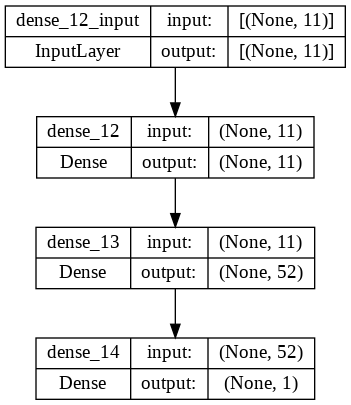

In [178]:
# Model plotting
tf.keras.utils.plot_model(model_seq1, show_shapes=True, show_layer_names=True)

#### Training

In [179]:
train_seq1=model_seq1.fit(train_dataset, validation_data=(val_dataset), epochs = 50)

Epoch 1/50
98/98 [==============================] - 1s 5ms/step - loss: 0.5653 - accuracy: 0.6938 - val_loss: 0.8655 - val_accuracy: 0.5911
Epoch 2/50
98/98 [==============================] - 0s 3ms/step - loss: 0.5429 - accuracy: 0.7343 - val_loss: 0.7118 - val_accuracy: 0.6524
Epoch 3/50
98/98 [==============================] - 0s 3ms/step - loss: 0.5212 - accuracy: 0.7477 - val_loss: 0.6514 - val_accuracy: 0.6818
Epoch 4/50
98/98 [==============================] - 0s 3ms/step - loss: 0.5143 - accuracy: 0.7512 - val_loss: 0.6247 - val_accuracy: 0.6871
Epoch 5/50
98/98 [==============================] - 0s 3ms/step - loss: 0.5092 - accuracy: 0.7491 - val_loss: 0.5964 - val_accuracy: 0.7004
Epoch 6/50
98/98 [==============================] - 1s 6ms/step - loss: 0.5024 - accuracy: 0.7528 - val_loss: 0.5941 - val_accuracy: 0.6996
Epoch 7/50
98/98 [==============================] - 0s 4ms/step - loss: 0.5019 - accuracy: 0.7541 - val_loss: 0.5852 - val_accuracy: 0.6960
Epoch 8/50
98/98 [==

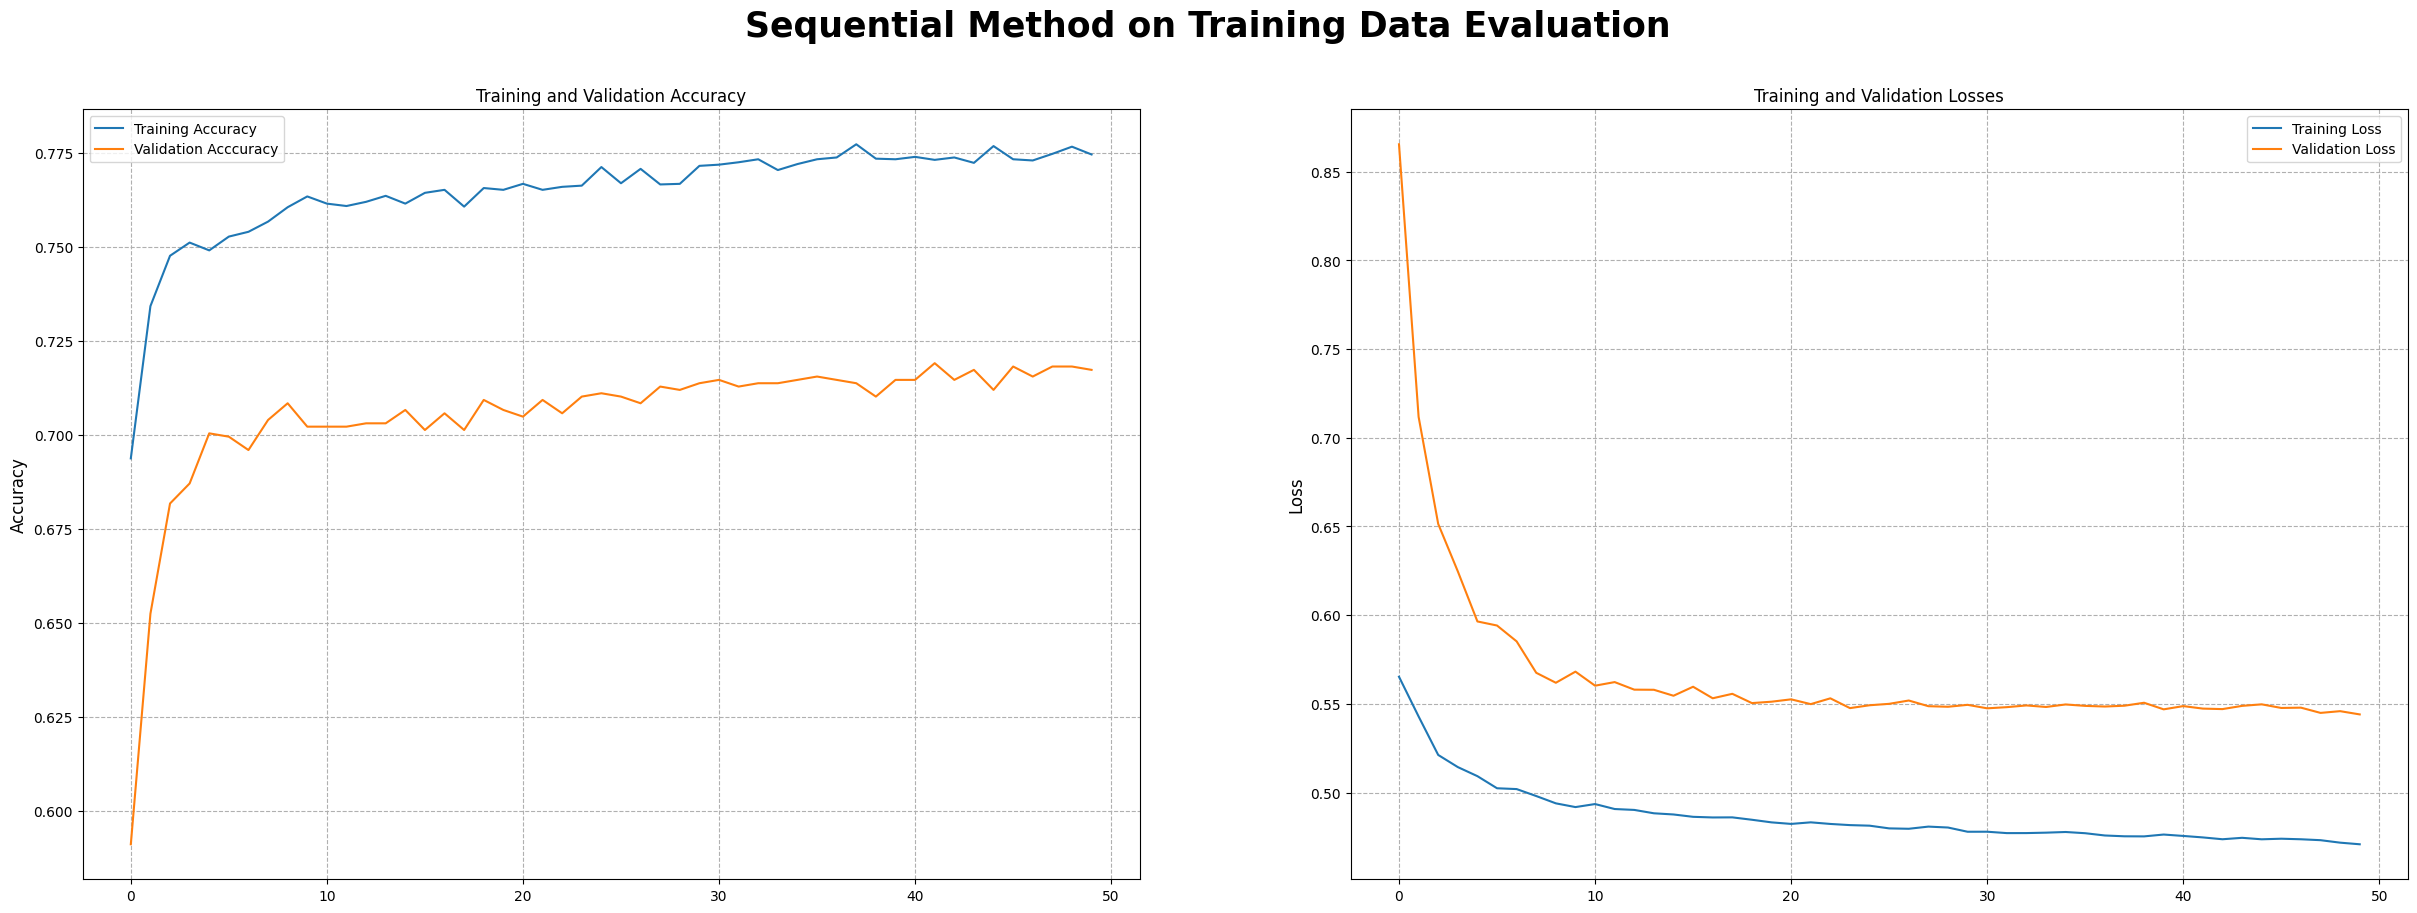

In [180]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(train_seq1.history['accuracy'],label="Training Accuracy")
plt.plot(train_seq1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(train_seq1.history['loss'], label="Training Loss")
plt.plot(train_seq1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Model Sequential:
- nilai akurasi dan loss menunjukkan model overfit
- performance model menunjukan sedikit terdapatnya exploding

#### Model Improvement - Sequential

In [181]:
# Sequential Model Architecture
model_seq2 = tf.keras.models.Sequential()

# Input layer
model_seq2.add(tf.keras.layers.Dense(inp, activation='relu', kernel_initializer='HeNormal', input_shape=(inp,))) 

# Hidden layer
model_seq2.add(tf.keras.layers.Dense(hid, activation='relu'))

# Output layer  
model_seq2.add(tf.keras.layers.Dense(out, activation='sigmoid'))

# Set the optimizer
optm2 = tf.keras.optimizers.Adagrad()

# Compiling the model
model_seq2.compile(optimizer = optm, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [182]:
model_seq2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 11)                132       
                                                                 
 dense_16 (Dense)            (None, 52)                624       
                                                                 
 dense_17 (Dense)            (None, 1)                 53        
                                                                 
Total params: 809
Trainable params: 809
Non-trainable params: 0
_________________________________________________________________


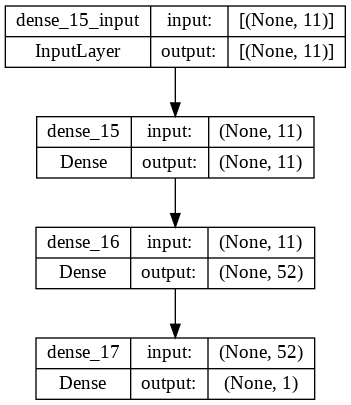

In [183]:
# Model plotting
tf.keras.utils.plot_model(model_seq2, show_shapes=True, show_layer_names=True)

In [184]:
#  Training the model
model_seq2.compile(loss='binary_crossentropy', 
                   optimizer=optm2,
                   metrics='accuracy')
model_seq2_history = model_seq2.fit(train_dataset, validation_data=(val_dataset), epochs = 50)

Epoch 1/50
98/98 [==============================] - 1s 4ms/step - loss: 0.6886 - accuracy: 0.5319 - val_loss: 0.6547 - val_accuracy: 0.6764
Epoch 2/50
98/98 [==============================] - 0s 3ms/step - loss: 0.6674 - accuracy: 0.6472 - val_loss: 0.6519 - val_accuracy: 0.6871
Epoch 3/50
98/98 [==============================] - 0s 3ms/step - loss: 0.6553 - accuracy: 0.6979 - val_loss: 0.6494 - val_accuracy: 0.6862
Epoch 4/50
98/98 [==============================] - 0s 3ms/step - loss: 0.6464 - accuracy: 0.7093 - val_loss: 0.6469 - val_accuracy: 0.6800
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 0.6393 - accuracy: 0.7187 - val_loss: 0.6443 - val_accuracy: 0.6809
Epoch 6/50
98/98 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.7252 - val_loss: 0.6418 - val_accuracy: 0.6836
Epoch 7/50
98/98 [==============================] - 0s 3ms/step - loss: 0.6278 - accuracy: 0.7285 - val_loss: 0.6393 - val_accuracy: 0.6844
Epoch 8/50
98/98 [==

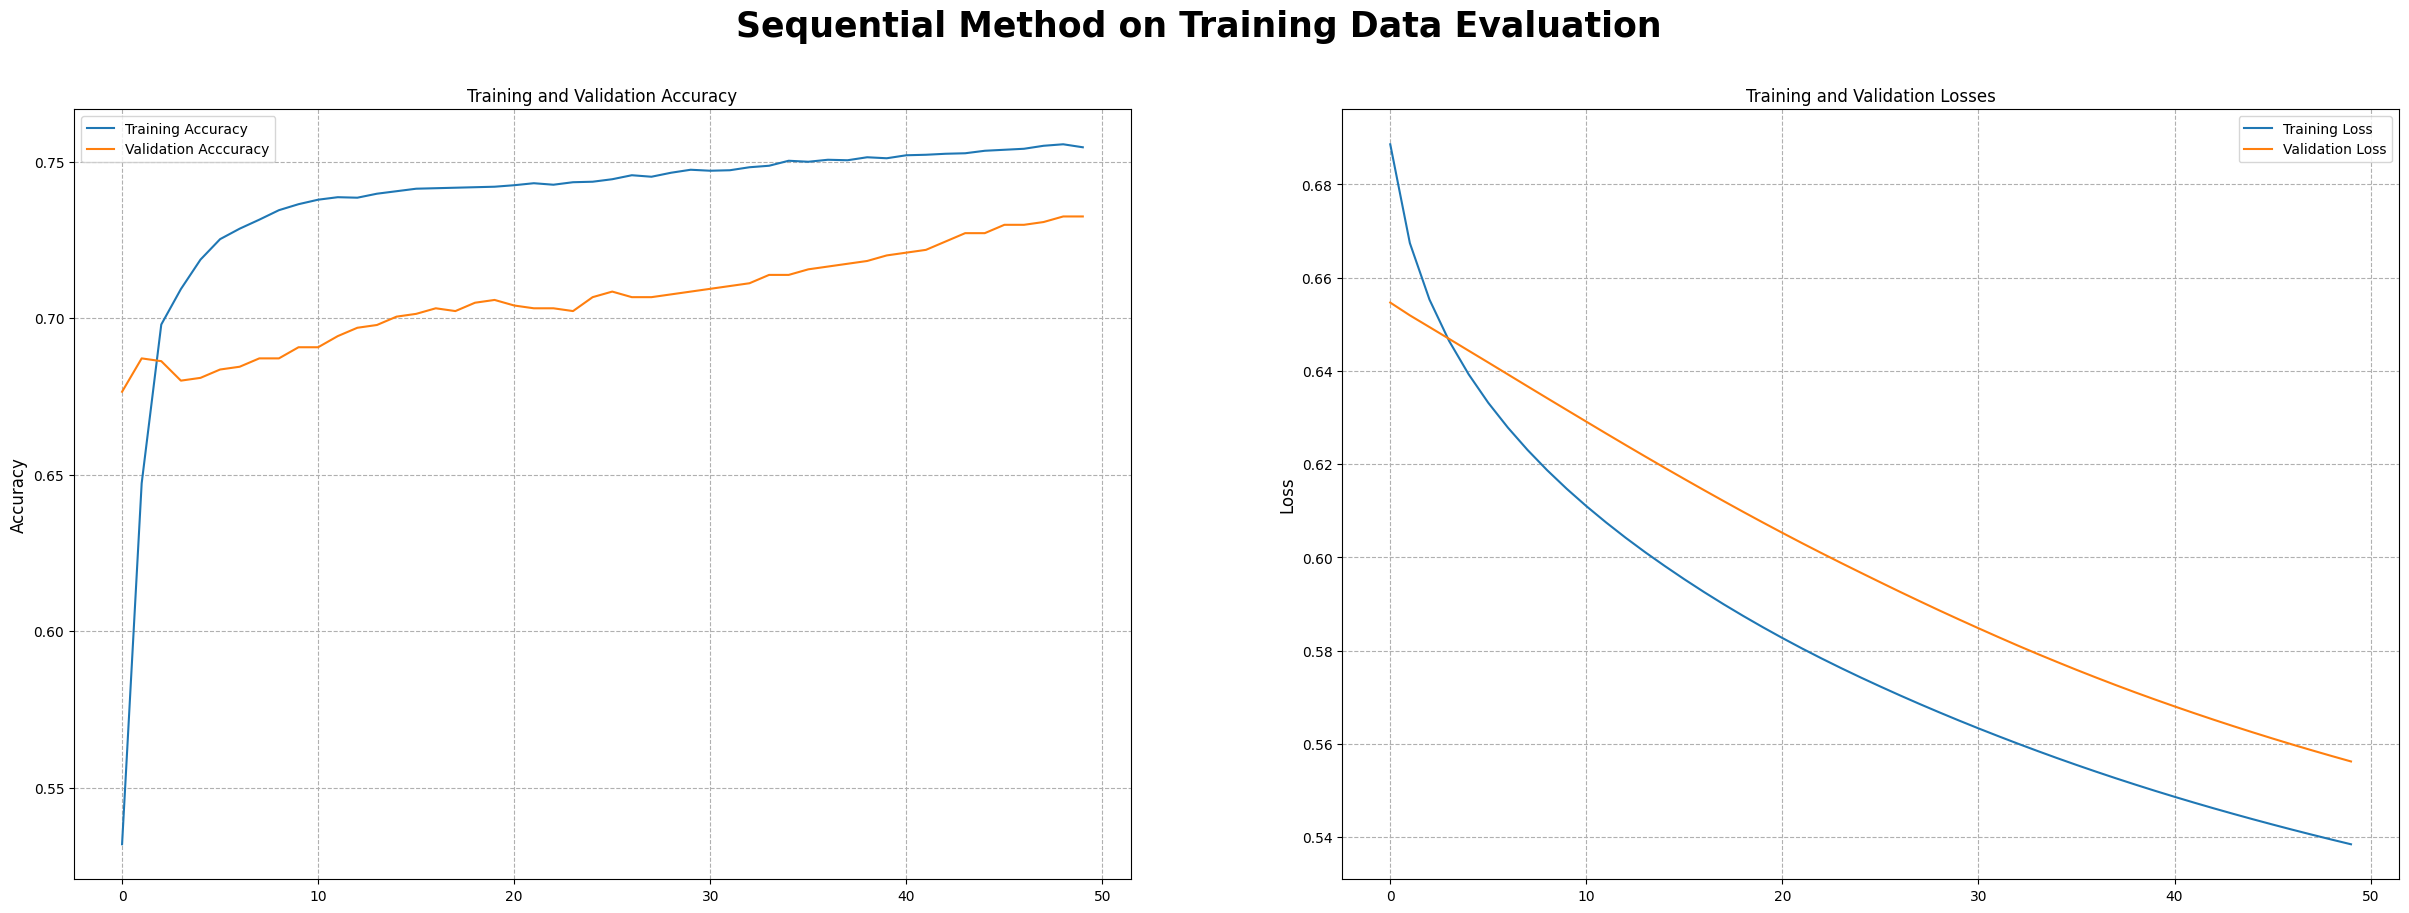

In [185]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(model_seq2_history.history['accuracy'],label="Training Accuracy")
plt.plot(model_seq2_history.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(model_seq2_history.history['loss'], label="Training Loss")
plt.plot(model_seq2_history.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Model Sequential tunning parameter:
- menggunakan optimizer adagrag
- nilai akurasi dan loss menunjukkan model overfit
- hilangnya exploding pada grafik
- tuning tidak menunjukan adanya peningkatan pada performa model

### Functional

In [186]:
# Setting the neuron
n_neuronFunc = (12, 6)
n_feature = x_resampled.shape[1]

# Input layer
data_input = Input(shape=(n_feature, )) # INPUT LAYER
hidden = data_input

# Hidden layer
for n in n_neuronFunc: # HIDDEN LAYER
    hidden = Dense(n, activation='relu')(hidden)
data_output = Dense(1, activation='sigmoid')(hidden) 

# Output layer
model_func = Model(inputs=data_input, outputs=data_output)

# Compile Model_Functional
model_func.compile(
    loss='binary_crossentropy',
    optimizer=optm, 
    metrics=['accuracy']
)

In [187]:
# Model summary
model_func.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_18 (Dense)            (None, 12)                144       
                                                                 
 dense_19 (Dense)            (None, 6)                 78        
                                                                 
 dense_20 (Dense)            (None, 1)                 7         
                                                                 
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________


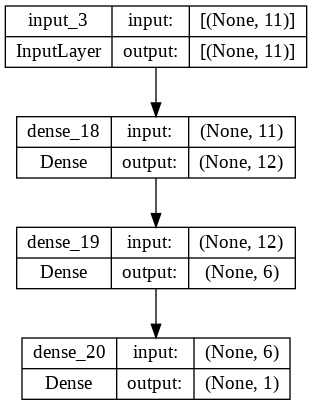

In [188]:
tf.keras.utils.plot_model(model_func, show_shapes = True)

#### Training

In [189]:
# Training the model
history_func = model_func.fit(train_dataset, validation_data = (val_dataset), epochs = 50)

Epoch 1/50
98/98 [==============================] - 1s 4ms/step - loss: 0.5556 - accuracy: 0.7093 - val_loss: 0.8789 - val_accuracy: 0.5627
Epoch 2/50
98/98 [==============================] - 0s 3ms/step - loss: 0.5320 - accuracy: 0.7400 - val_loss: 0.6544 - val_accuracy: 0.6551
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 0.5195 - accuracy: 0.7517 - val_loss: 0.5689 - val_accuracy: 0.7049
Epoch 4/50
98/98 [==============================] - 0s 3ms/step - loss: 0.5009 - accuracy: 0.7558 - val_loss: 0.5596 - val_accuracy: 0.7111
Epoch 5/50
98/98 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.7534 - val_loss: 0.5449 - val_accuracy: 0.7227
Epoch 6/50
98/98 [==============================] - 0s 4ms/step - loss: 0.4956 - accuracy: 0.7585 - val_loss: 0.5409 - val_accuracy: 0.7236
Epoch 7/50
98/98 [==============================] - 0s 4ms/step - loss: 0.4927 - accuracy: 0.7624 - val_loss: 0.5326 - val_accuracy: 0.7280
Epoch 8/50
98/98 [==

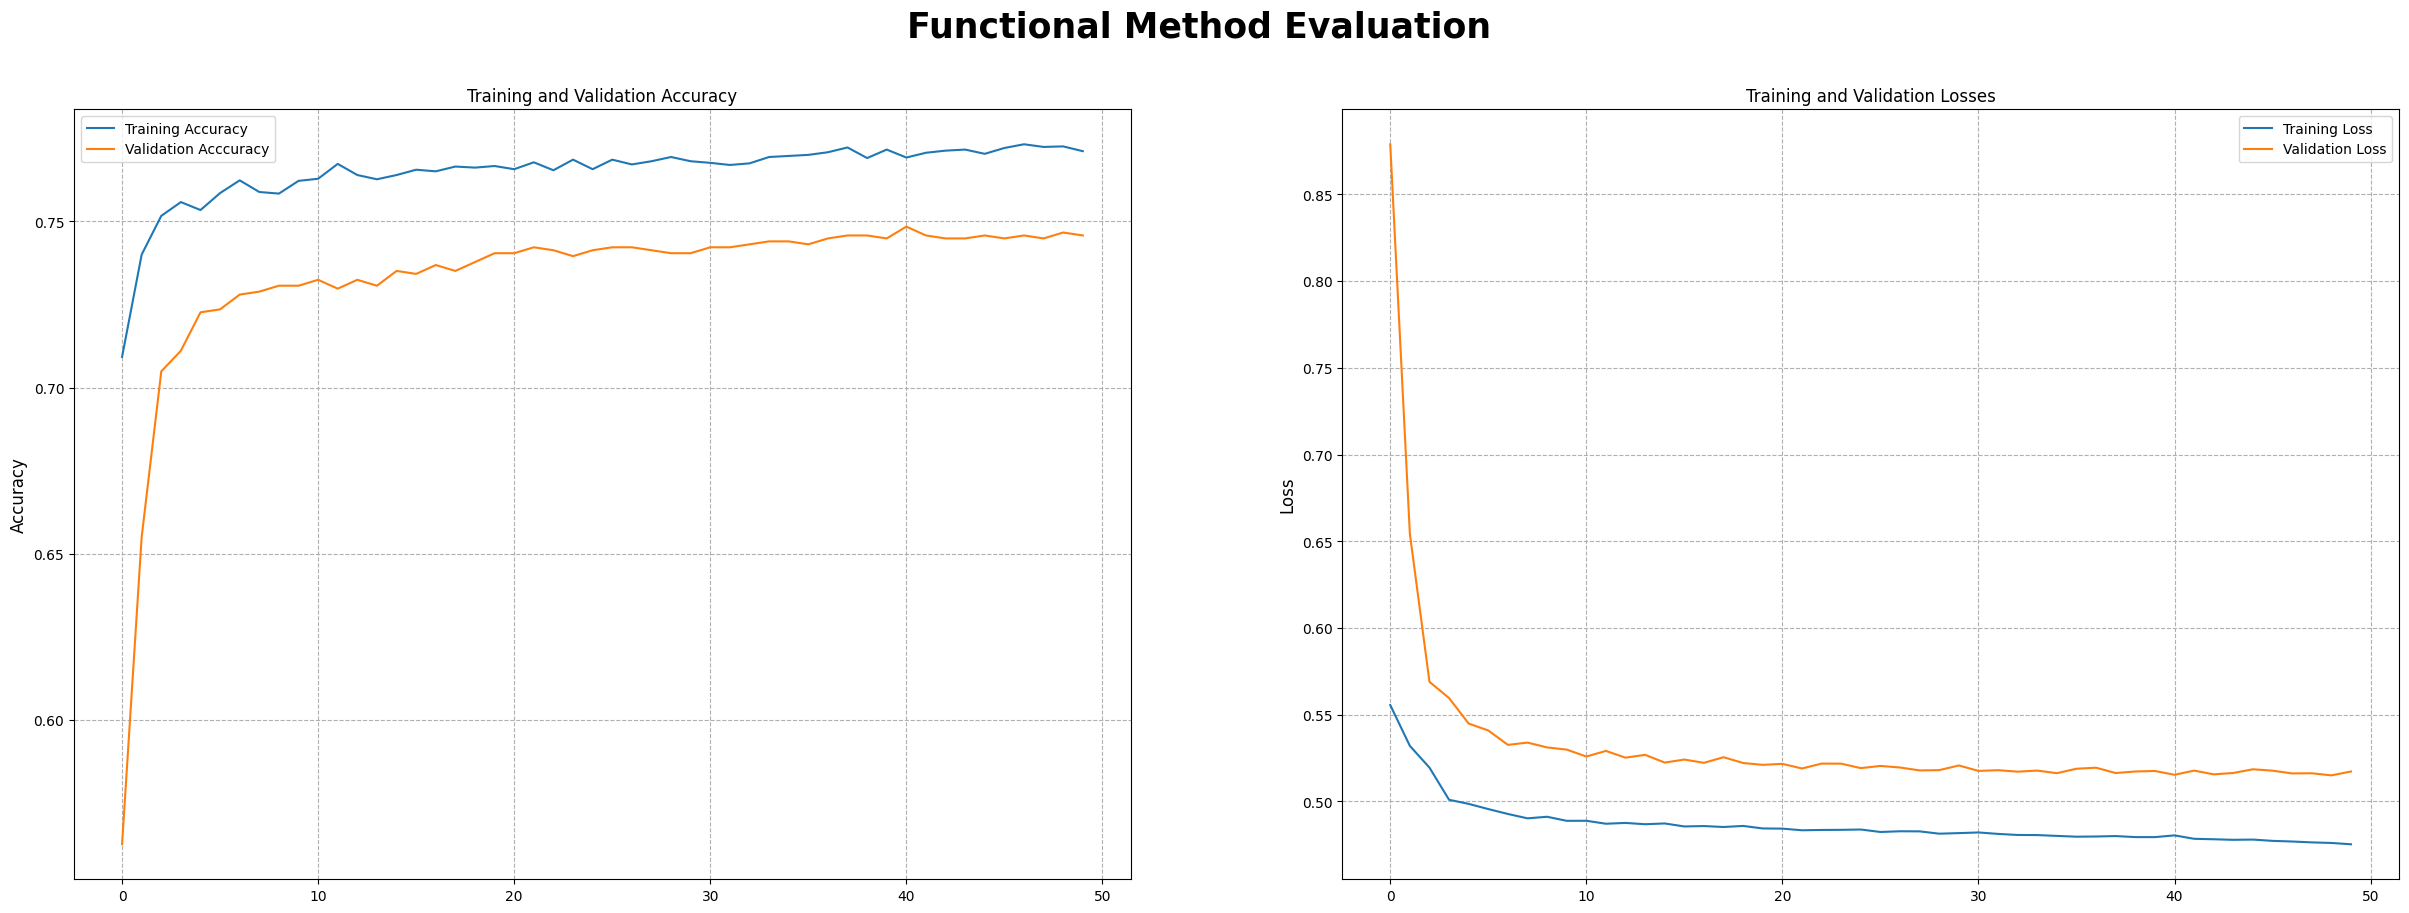

In [190]:
# Loss and accuracy model plotting
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
fig.suptitle('Functional Method Evaluation', fontsize = 25, weight = 'bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize = 12)
plt.plot(history_func.history['accuracy'], label = "Training Accuracy")
plt.plot(history_func.history['val_accuracy'], label = "Validation Acccuracy")
plt.ylabel("Accuracy", fontsize = 12)
plt.legend()
plt.grid(linestyle = '--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize = 12)
plt.plot(history_func.history['loss'], label = "Training Loss")
plt.plot(history_func.history['val_loss'], label = "Validation Loss")
plt.ylabel("Loss", fontsize = 12)
plt.legend()
plt.grid(linestyle = '--')

plt.style.use('default')
plt.show()

Model functional:
- nilai akurasi dan loss menunjukkan model overfit
- performance model menunjukan terdapatnya exploding

#### Functional Improvement

In [191]:
n_neuronfunc = (12, 6)   

# Arsitektur Model_Functional
data_input_2 = Input(shape=(n_feature, ))                # Input Layer

hidden2 = data_input_2
for n in n_neuronfunc:                              # Hidden Layer
    hidden2 = Dense(n, activation='relu')(hidden2)

data_out = Dense(1, activation='sigmoid')(hidden2) # Output Layer

model_func2 = Model(inputs=data_input_2, outputs=data_out)

In [192]:
model_func2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_21 (Dense)            (None, 12)                144       
                                                                 
 dense_22 (Dense)            (None, 6)                 78        
                                                                 
 dense_23 (Dense)            (None, 1)                 7         
                                                                 
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________


In [193]:
model_func2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics='accuracy')
Imp_history_func = model_func2.fit(train_dataset, epochs=50, validation_data=(val_dataset))

Epoch 1/50
98/98 [==============================] - 1s 4ms/step - loss: 0.7294 - accuracy: 0.4153 - val_loss: 0.6956 - val_accuracy: 0.5369
Epoch 2/50
98/98 [==============================] - 0s 3ms/step - loss: 0.7168 - accuracy: 0.4448 - val_loss: 0.6912 - val_accuracy: 0.5644
Epoch 3/50
98/98 [==============================] - 0s 3ms/step - loss: 0.7065 - accuracy: 0.4939 - val_loss: 0.6871 - val_accuracy: 0.5804
Epoch 4/50
98/98 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5483 - val_loss: 0.6830 - val_accuracy: 0.6000
Epoch 5/50
98/98 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5844 - val_loss: 0.6792 - val_accuracy: 0.6080
Epoch 6/50
98/98 [==============================] - 0s 3ms/step - loss: 0.6811 - accuracy: 0.6097 - val_loss: 0.6754 - val_accuracy: 0.6204
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.6348 - val_loss: 0.6717 - val_accuracy: 0.6338
Epoch 8/50
98/98 [==

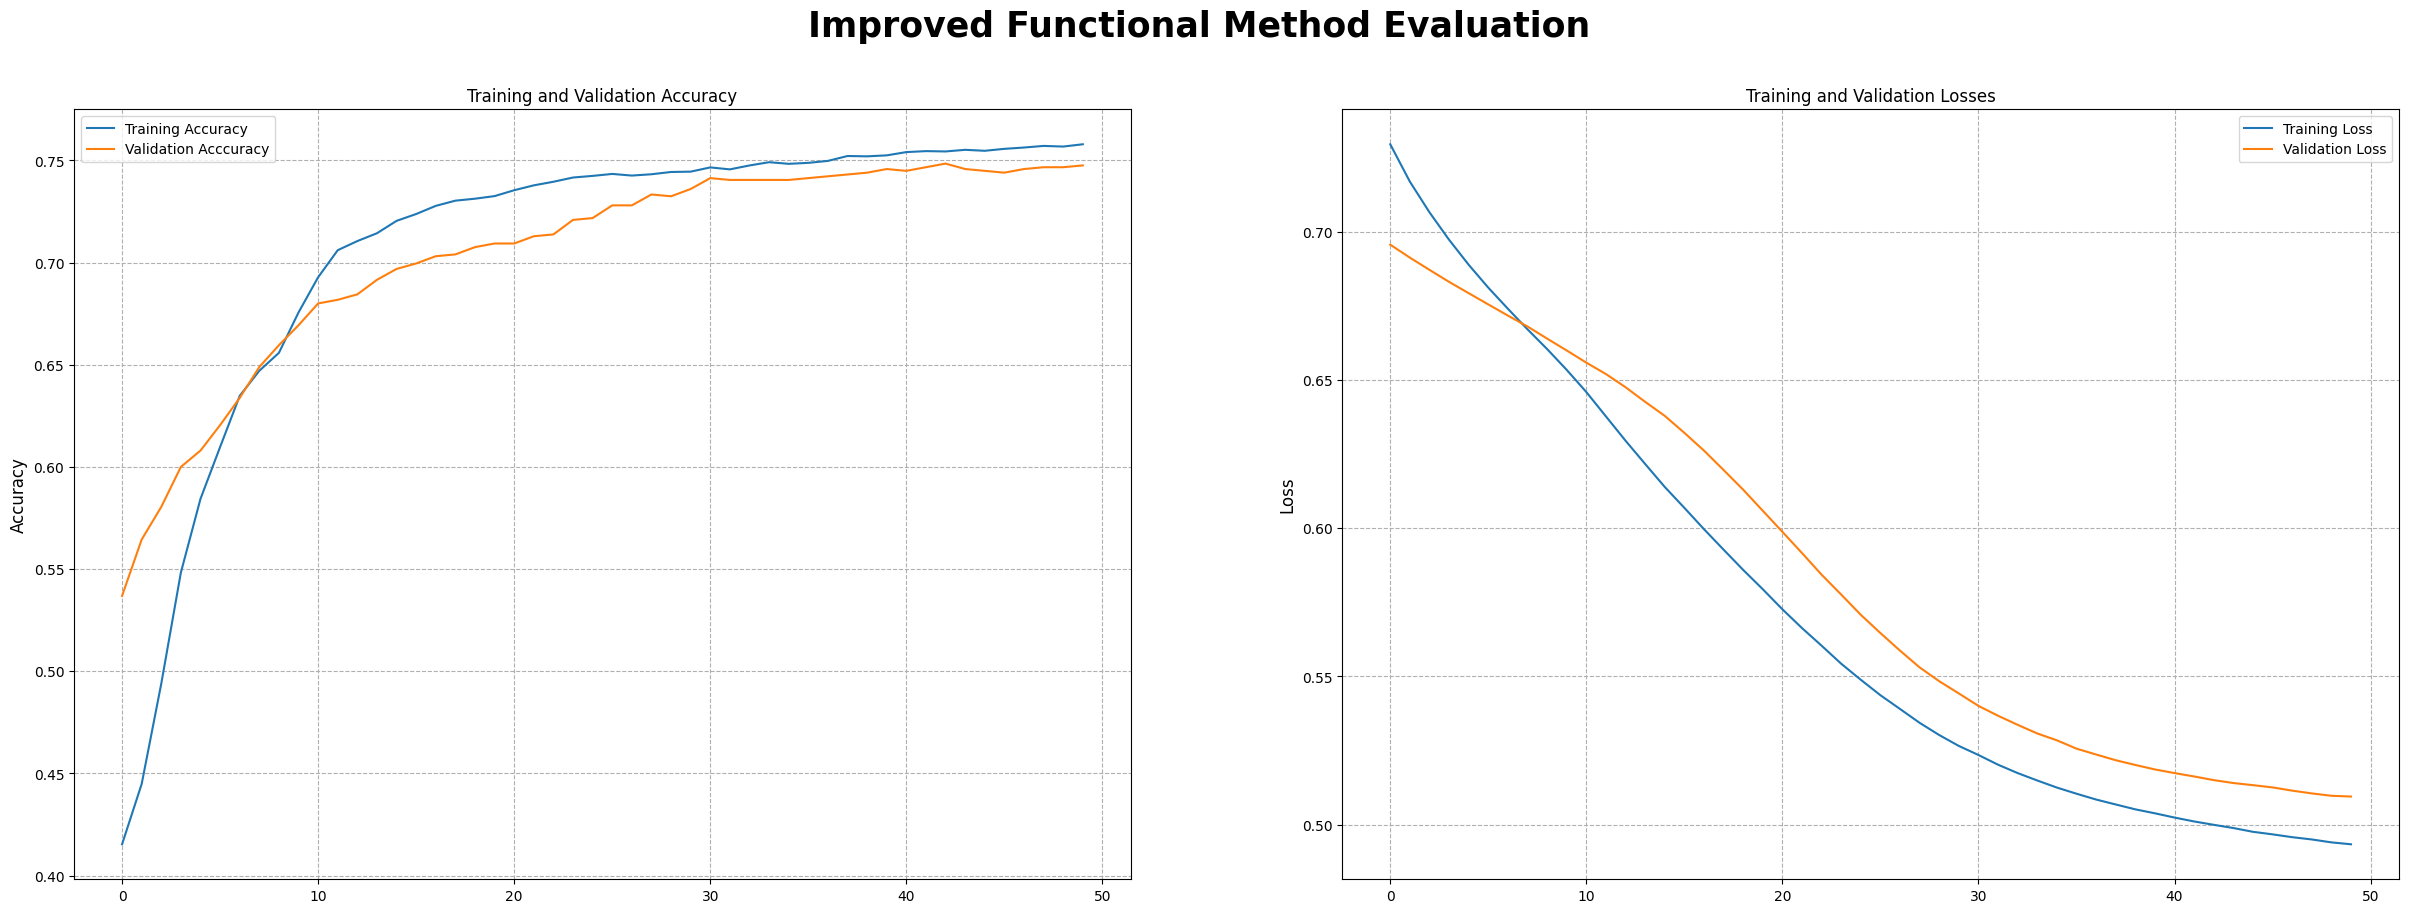

In [194]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Improved Functional Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(Imp_history_func.history['accuracy'],label="Training Accuracy")
plt.plot(Imp_history_func.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(Imp_history_func.history['loss'], label="Training Loss")
plt.plot(Imp_history_func.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Model Sequential tunning parameter:
- menggunakan optimizer adam dengan menentukan nilai learning ratenya
- nilai akurasi dan loss menunjukkan model justfit
- berkurangnya exploding pada grafik
- tuning menunjukan adanya peningkatan pada performa model. proses tunging mengurangi overfit yang sebelumnya terjadi pada model

### Model Evaluation

#### Sequential

22/22 [==============================] - 0s 2ms/step
========== TEST ==========
              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1033
           1       0.47      0.79      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.71      0.73      1407



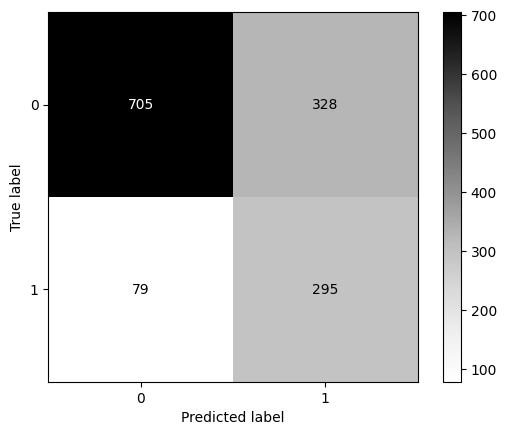

In [195]:
# predict probabilities
y_pred_sequent = model_seq2.predict(test_dataset)
y_pred_sequent = (y_pred_sequent > 0.5)

# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_sequent, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_sequent)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

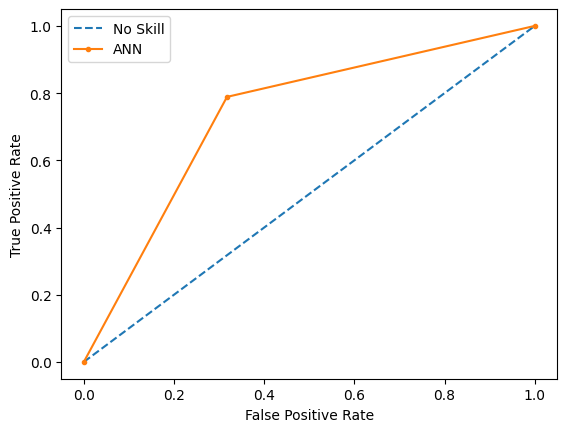

AUC score: 0.7356241361280936


In [196]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sequent)
auc = roc_auc_score(y_test, y_pred_sequent)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

Dari hasil model evaluation kita fokus ke nilai recall yaitu predict 1 sebesar 0.79 dan kita lihat dari nilai UC score dimana ditetapkan treshold sebesar 0,5 dan skor metode sekuensial kali ini adalah 0,735 , dapat diambil kesimpulan bahwasannya model berjalan dengan baik

#### Functional

22/22 [==============================] - 0s 1ms/step
========== TEST ==========
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1033
           1       0.51      0.77      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407



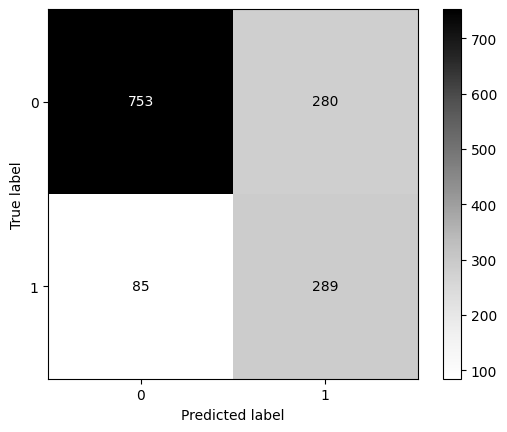

In [197]:
# predict probabilities
y_pred_func = model_func2.predict(test_dataset)
y_pred_func = (y_pred_func > 0.5)

# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_func, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_func)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greys')
plt.show()

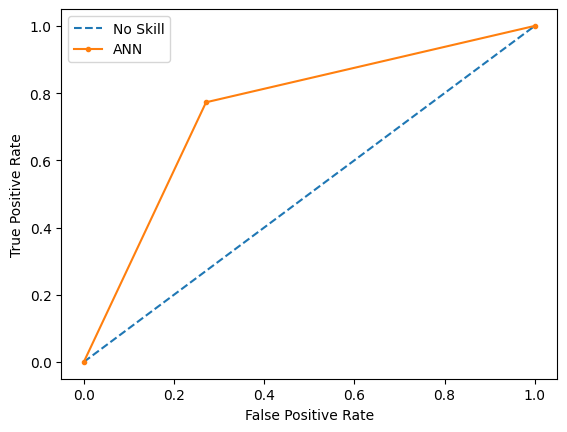

AUC score: 0.7508360468186217


In [198]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_func)
auc = roc_auc_score(y_test, y_pred_func)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

- fokus terhadap nilai recall yaitu predict 1 sebesar 0.77 dan kita lihat dari nilai UC score dimana ditetapkan treshold sebesar 0,5 dan skor metode sekuensial kali ini adalah 0,750 , dapat diambil kesimpulan bahwasannya model berjalan dengan baik
- model functional dengan tunning menunjukan performa model terbaik dibandingkan model lainnya

### Model Saving

In [199]:
pickle.dump(full_pipeline, open('model_milestones1.pkl','wb'))

model_func2.save('model_churn.h5')

In [200]:
import sklearn
print(tf.__version__)
print(sklearn.__version__)
print(np.__version__)

2.9.2
1.0.2
1.21.6


### Model Inference

In [213]:
inference = pd.DataFrame({'tenure': [34, 16, 60],
 'TotalCharges': [1993.56, 1397.47, 3594.74],
 'MonthlyCharges': [103.20, 70.35, 35.45],
 'Contract': ['One year', 'Two year', 'Two year'],
 'PaymentMethod': ['Credit card (automatic)', 'Electronic check', 'Credit card (automatic)'],
 'InternetService': ['DSL', 'DSL', 'Fiber optic'],
 'SeniorCitizen': [1, 0, 0],
 'Dependents': ['No', 'Yes', 'No']})

In [214]:
for i in range(3):
    inference.loc[i, 'tenure']

inference

,tenure,TotalCharges,MonthlyCharges,Contract,PaymentMethod,InternetService,SeniorCitizen,Dependents
0,34,1993.56,103.20,One year,Credit card (automatic),DSL,1,No
1,16,1397.47,70.35,Two year,Electronic check,DSL,0,Yes
2,60,3594.74,35.45,Two year,Credit card (automatic),Fiber optic,0,No


In [215]:
data_inf = full_pipeline.transform(inference)

In [216]:
inf_predict = np.round(model_func2.predict(data_inf))
inf_predict

1/1 [==============================] - 0s 19ms/step


array([[1.],
       [0.],
       [0.]], dtype=float32)

### Conclusion
- Model Functional dengan tunning parameter dapat memprediksi Churn dengan cukup baik. hal tersebut didukung dari nilai pada matric evaluation dan AUC score yang dihasilkan oleh model.
- tunning pada kedua model mengurangi exploding yang terbentuk
- hasil yang baik pada pemodelan menunjukan proses imbalance handling membantu model untuk memprediksi data dengan baik
- improvement model selanjutnya dapat dilakukan dengan mencoba tunning parameter lainnya